# House Prices Attempt II: Random Forest Regression

According to the [Scikit-Learn estimator choosing guide](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), if your linear regressor does not work then you should try ensemble regressors. The simplest option here is a randomized forest regression.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("../data/train.csv")
data_augmented = pd.read_csv("../data-augmented/train_augmented.csv")
print(data.shape)

(1460, 81)


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

X = data_augmented
y = data['SalePrice'][data_augmented.index]

model = RandomForestRegressor(n_estimators=10)
model.fit(X,y)


cv_split = 4
cv_score = cross_val_score(model, X, y, cv=cv_split)
print("Score: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

Score: 0.85 (+/- 0.04)


Similar expected score but much better deviation with different CV datasets. Let's see if varying the number of estimators makes a difference.

In [5]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [10, 30, 100, 300, 1000]}

grid = GridSearchCV(RandomForestRegressor(),param_grid, cv = cv_split)
grid.fit(X,y)
model = grid.best_estimator_
cv_score = cross_val_score(model, X, y, cv=cv_split)
print("Score: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

Score: 0.85 (+/- 0.05)


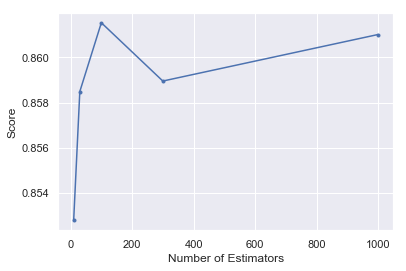

In [10]:
plt.plot(param_grid['n_estimators'],grid.cv_results_['mean_test_score'],'.-')
plt.xlabel('Number of Estimators')
plt.ylabel('Score');

The score levels off after 10 estimators so seems like there is no need to increase it further. The ensemble technique did improve the score by 0.03 and is much more stable than the linear regression.

<module 'matplotlib.pyplot' from 'C:\\Users\\mster\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

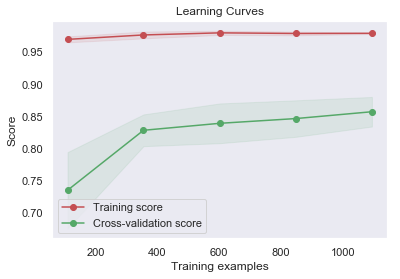

In [9]:
from plot_learning_curve import plot_learning_curve

title = 'Learning Curves'
plot_learning_curve(model,title,X,y,cv = cv_split)

Unlike for the linear regression, the cross validation score appears to be steadily increasing with the number of training examples (although the high variance in the CV score raises some doubt, more testing would confirm). More training examples would help as well as 'pruning' or reducing the number of maximum features.

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_features': [10, 20, 40, 100, 200]}

grid = GridSearchCV(RandomForestRegressor(n_estimators=100),param_grid, cv = cv_split)
grid.fit(X,y)
model = grid.best_estimator_
cv_score = cross_val_score(model, X, y, cv=cv_split)
print("Score: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

Score: 0.86 (+/- 0.05)


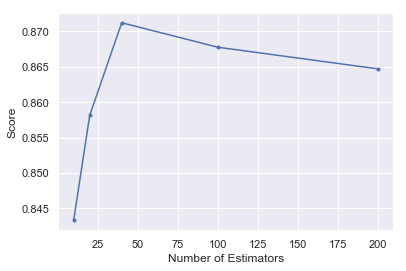

In [13]:
plt.plot(param_grid['max_features'],grid.cv_results_['mean_test_score'],'.-')
plt.xlabel('Number of Estimators')
plt.ylabel('Score');

<module 'matplotlib.pyplot' from 'C:\\Users\\mster\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

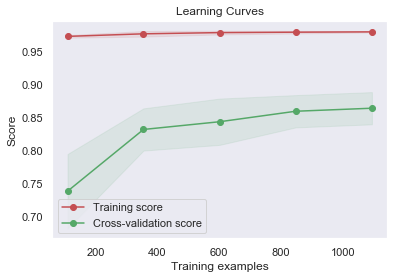

In [14]:
from plot_learning_curve import plot_learning_curve

title = 'Learning Curves'
plot_learning_curve(model,title,X,y,cv = cv_split)